In [62]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder as OE
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import plot_importance

In [63]:
d = "C:\kaggle_data\credit_card"

In [64]:
lst = os.listdir(d)
print(lst)

['sample_submission.csv', 'test.csv', 'train.csv']


In [65]:
train = pd.read_csv(d + '\\' +lst[2])
test = pd.read_csv(d + '\\' +lst[1])
ss = pd.read_csv(d + '\\' +lst[0])
total = pd.concat([train, test])
cols = total.columns.to_list()

In [66]:
from sklearn.preprocessing import LabelEncoder as LE
labels = ['gender', 'car', 'reality', 'work_phone', 'phone', 'email', 'occyp_type', 'income_type', 'edu_type', 'family_type', 'house_type']
for label in labels:
    enc = LE()
    enc.fit(total[label])
    train[label] = enc.transform(train[label])
    test[label] = enc.transform(test[label])

In [67]:
import xgboost as xgb
rk_clf = xgb.XGBRFClassifier(random_state=1123)
sk_clf = xgb.XGBRFClassifier(random_state=1123)

In [68]:
cols.remove('index')
cols.remove('gender')

In [69]:
cols

['car',
 'reality',
 'child_num',
 'income_total',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'work_phone',
 'phone',
 'email',
 'occyp_type',
 'family_size',
 'begin_month',
 'credit']

In [17]:
X = train[['car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month']]
y = train['credit']

In [18]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=1123)

from sklearn.model_selection import KFold
rkf = KFold(n_splits=5, shuffle=True, random_state=1123)

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
%%time
score_rkf = cross_val_score(rk_clf, X, y, cv=rkf)

Wall time: 6.84 s


In [21]:
%%time
score_skf = cross_val_score(sk_clf, X, y, cv=skf)

Wall time: 6.39 s


In [22]:
score_rkf.mean()

0.6905925834497264

In [23]:
score_skf.mean()

0.6904032475461047

In [24]:
test_X = test[['car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month']]

In [25]:
sk_clf.fit(X, y, eval_metric='logloss')
rk_clf.fit(X,y, eval_metric='logloss')

pred_sk = sk_clf.predict_proba(test_X)
pred_rk = rk_clf.predict_proba(test_X)

In [26]:
pred_sk

array([[0.16413851, 0.19261362, 0.6432479 ],
       [0.16508152, 0.1888412 , 0.6460773 ],
       [0.16849141, 0.19378577, 0.6377228 ],
       ...,
       [0.15417996, 0.18455596, 0.66126406],
       [0.1547859 , 0.19345528, 0.65175885],
       [0.18115762, 0.21632886, 0.60251355]], dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

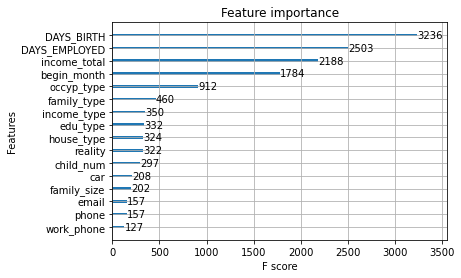

In [30]:
from xgboost import plot_importance
plot_importance(sk_clf)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

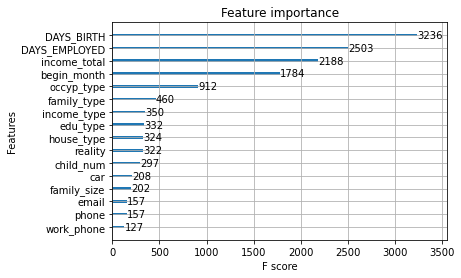

In [31]:
plot_importance(rk_clf)

In [29]:
pd.DataFrame(pred_sk)

,0,1,2
0,0.164139,0.192881,0.642980
1,0.163794,0.189427,0.646779
2,0.168561,0.194095,0.637344
3,0.165845,0.188210,0.645945
4,0.173882,0.201297,0.624821
...,...,...,...
9995,0.162831,0.192138,0.645031
9996,0.170550,0.212975,0.616475
9997,0.155128,0.185603,0.659269
9998,0.155454,0.192071,0.652476


In [27]:
ss.drop(['0','1','2'],1)

,index
0,26457
1,26458
2,26459
3,26460
4,26461
...,...
9995,36452
9996,36453
9997,36454
9998,36455


In [28]:
ss_sk = pd.concat([ss.drop(['0','1','2'],1),pd.DataFrame(pred_sk)],axis=1)
ss_rk = pd.concat([ss.drop(['0','1','2'],1),pd.DataFrame(pred_rk)],axis=1)

In [29]:
ss_rk.to_csv('kf_gender_drop.csv',index=False)
ss_sk.to_csv('sk_gender_drop.csv',index=False)

In [30]:
ss_rk

,index,0,1,2
0,26457,0.164139,0.192614,0.643248
1,26458,0.165082,0.188841,0.646077
2,26459,0.168491,0.193786,0.637723
3,26460,0.166227,0.188554,0.645219
4,26461,0.175707,0.201037,0.623256
...,...,...,...,...
9995,36452,0.163872,0.192526,0.643602
9996,36453,0.170637,0.213456,0.615907
9997,36454,0.154180,0.184556,0.661264
9998,36455,0.154786,0.193455,0.651759


In [104]:
ss['index']

0       26457
1       26458
2       26459
3       26460
4       26461
        ...  
9995    36452
9996    36453
9997    36454
9998    36455
9999    36456
Name: index, Length: 10000, dtype: int64